## Metode Trapesium

$ \int_{a}^{b} f(x) dx = \frac{h}{2} \left[ f(x_0) + 2f(x_1) + 2f(x_2) + ... + 2f(x_{n-1}) + f(x_n) \right] $

### **Contoh**

$ f(x) = 3x^5 - 8x^4 $
- batas atas = 16
- batas bawah = 4

carilah hasil fungsi berikut dengan metode trapesium
- $ f(4) $
- $ f(7) $
- $ f(10) $
- $ f(13) $
- $ f(16) $

In [ ]:
%pip install numpy matplotlib tabulate

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Fungsi yang diberikan
def f(x):
    return 3*x**5 - 8*x**4

# Titik-titik (5 titik → 4 segmen)
x_values = np.array([4, 7, 10, 13, 16])
f_values = f(x_values)
h = (x_values[-1] - x_values[0]) / (len(x_values) - 1)

# Metode Trapesium Berganda
trapezoid_integral = (h / 2) * (
    f_values[0] +
    2 * np.sum(f_values[1:-1]) +
    f_values[-1]
)

# Integral eksak
def integral_exact(x):
    return (x**6 / 2) - (8 * x**5 / 5)

exact_integral = integral_exact(16) - integral_exact(4)
error = abs(trapezoid_integral - exact_integral) / exact_integral * 100

# Tabel hasil
table_data = [
    ["x", "f(x)"],
    *[[x, fx] for x, fx in zip(x_values, f_values)],
    ["", ""],
    ["Luas (Trapesium)", f"{trapezoid_integral:.2f}"],
    ["Luas (Eksak)", f"{exact_integral:.2f}"],
    ["Error (%)", f"{error:.3f}%"]
]

print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid"))


╒══════════════════╤════════════╕
│ x                │ f(x)       │
╞══════════════════╪════════════╡
│ 4                │ 1024       │
├──────────────────┼────────────┤
│ 7                │ 31213      │
├──────────────────┼────────────┤
│ 10               │ 220000     │
├──────────────────┼────────────┤
│ 13               │ 885391     │
├──────────────────┼────────────┤
│ 16               │ 2621440    │
├──────────────────┼────────────┤
│                  │            │
├──────────────────┼────────────┤
│ Luas (Trapesium) │ 7343508.00 │
├──────────────────┼────────────┤
│ Luas (Eksak)     │ 6710476.80 │
├──────────────────┼────────────┤
│ Error (%)        │ 9.433%     │
╘══════════════════╧════════════╛


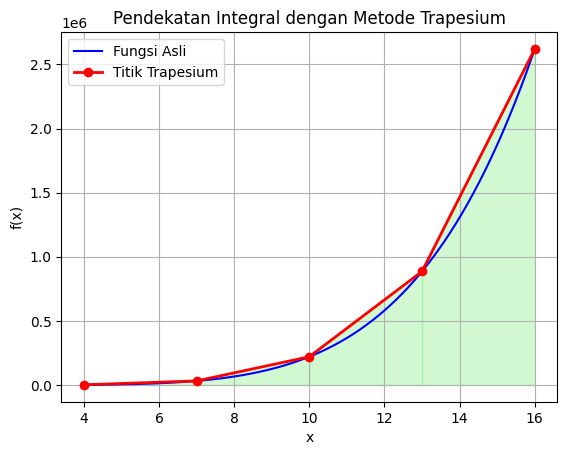

In [7]:
# Plot fungsi dan pendekatan trapesium
x_plot = np.linspace(4, 16, 1000)
y_plot = f(x_plot)

# plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label="Fungsi Asli", color="blue")
plt.plot(x_values, f_values, 'ro-', label="Titik Trapesium", linewidth=2)
for i in range(len(x_values) - 1):
    plt.fill_between([x_values[i], x_values[i+1]],
                     [f_values[i], f_values[i+1]],
                     color='lightgreen', alpha=0.4)

plt.title("Pendekatan Integral dengan Metode Trapesium")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()